# Análise de Churn

Churn refere-se aos clientes que deixaram de usar o serviço ou está prestes a sair.

## Carregando datasets e importando dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [2]:
churn = pd.read_csv('Bank Customer Churn Prediction.csv')
churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [4]:
# Configurações
plt.style.use('ggplot')
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)


In [5]:
churn.info

<bound method DataFrame.info of       customer_id  credit_score  country  gender  age  tenure    balance  \
0        15634602           619   France  Female   42       2       0.00   
1        15647311           608    Spain  Female   41       1   83807.86   
2        15619304           502   France  Female   42       8  159660.80   
3        15701354           699   France  Female   39       1       0.00   
4        15737888           850    Spain  Female   43       2  125510.82   
...           ...           ...      ...     ...  ...     ...        ...   
9995     15606229           771   France    Male   39       5       0.00   
9996     15569892           516   France    Male   35      10   57369.61   
9997     15584532           709   France  Female   36       7       0.00   
9998     15682355           772  Germany    Male   42       3   75075.31   
9999     15628319           792   France  Female   28       4  130142.79   

      products_number  credit_card  active_member  esti

In [6]:
churn.nunique().sort_values()

gender                  2
credit_card             2
active_member           2
churn                   2
country                 3
products_number         4
tenure                 11
age                    70
credit_score          460
balance              6382
estimated_salary     9999
customer_id         10000
dtype: int64

In [7]:
churn['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
print(f'Nosso dataset contem clientes cuja idade vai de {churn['age'].min()} até {churn['age'].max()}')

Nosso dataset contem clientes cuja idade vai de 18 até 92


In [9]:
churn.query('balance == 0')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.0,1,1,1,101348.88,1
3,15701354,699,France,Female,39,1,0.0,2,0,0,93826.63,0
6,15592531,822,France,Male,50,7,0.0,2,1,1,10062.80,0
11,15737173,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0
12,15632264,476,France,Female,34,10,0.0,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15605622,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0
9992,15657105,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0
9994,15719294,800,France,Female,29,2,0.0,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.0,2,1,0,96270.64,0


In [10]:
churn.query(f'balance in {churn.balance.nlargest(3).to_list()} or estimated_salary in {churn.estimated_salary.nlargest(3).to_list()}')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
2092,15757408,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,15715622,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
3580,15634359,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,15697270,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
6646,15662021,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
8733,15714241,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


## Explorando o dataset

In [11]:
churn.gender.value_counts(normalize=True)

gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

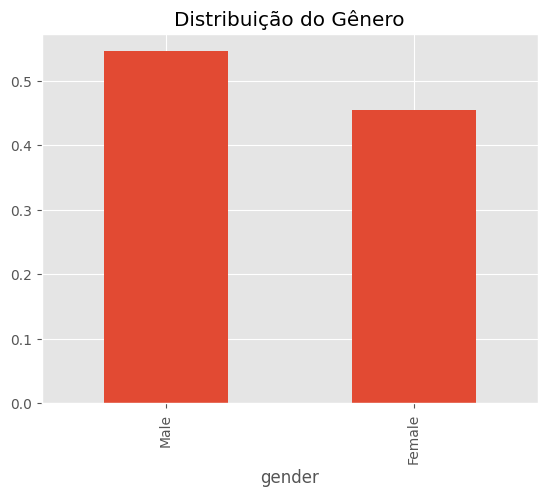

In [12]:
_ = churn.gender.value_counts(normalize=True).plot.bar()
_ = plt.title('Distribuição do Gênero')

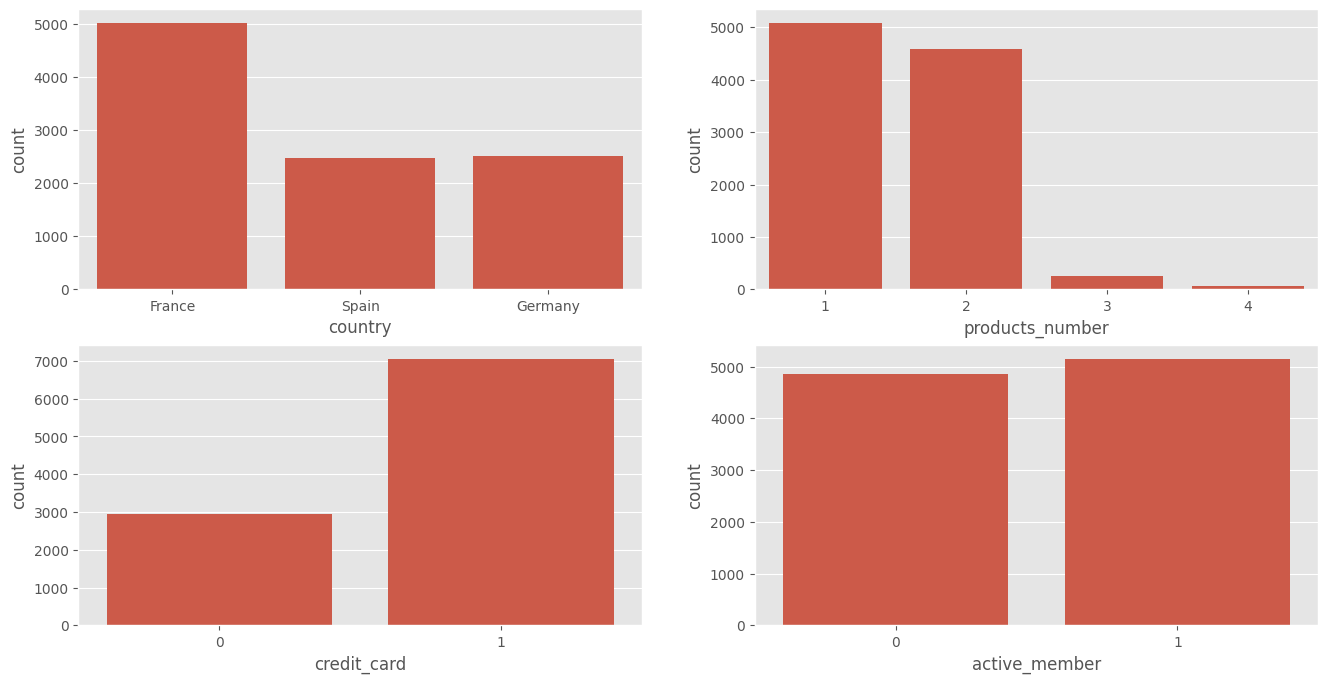

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
_ = sns.countplot(data=churn, x='country', ax=axes[0][0])
_ = sns.countplot(data=churn, x='products_number', ax=axes[0][1])
_ = sns.countplot(data=churn, x='credit_card', ax=axes[1][0])
_ = sns.countplot(data=churn, x='active_member', ax=axes[1][1])

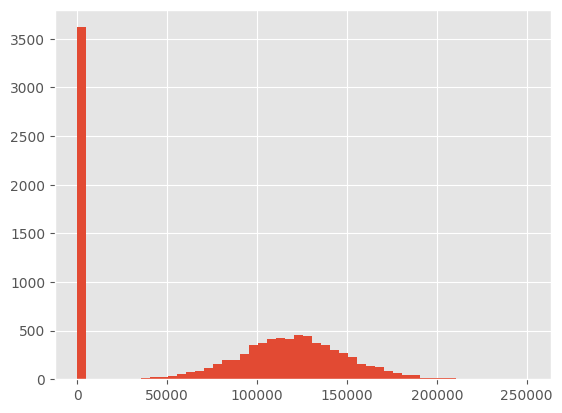

In [14]:
_ = plt.hist(churn.balance, bins=50)

In [15]:
clientes_zerado = len(churn.query('balance==0'))
total_clientes = len(churn)

print(f'Temos {(clientes_zerado/total_clientes)*100}% de nossos clientes sem saldo')

Temos 36.17% de nossos clientes sem saldo


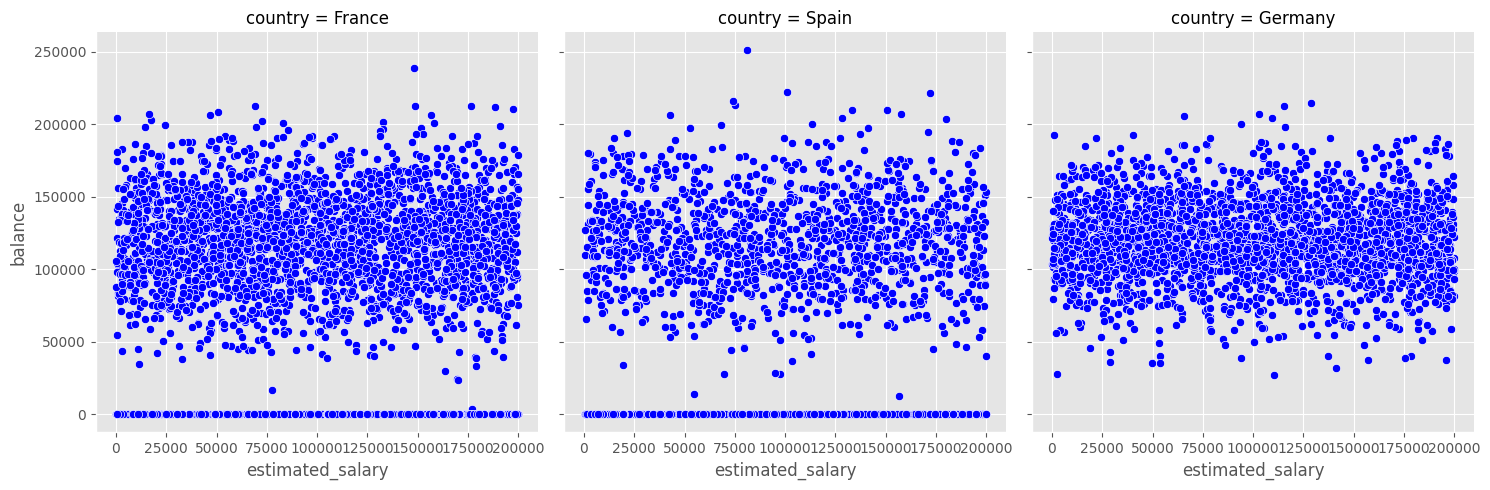

In [16]:
_ = sns.relplot(x = 'estimated_salary', y = 'balance', data=churn, col='country', color='b')

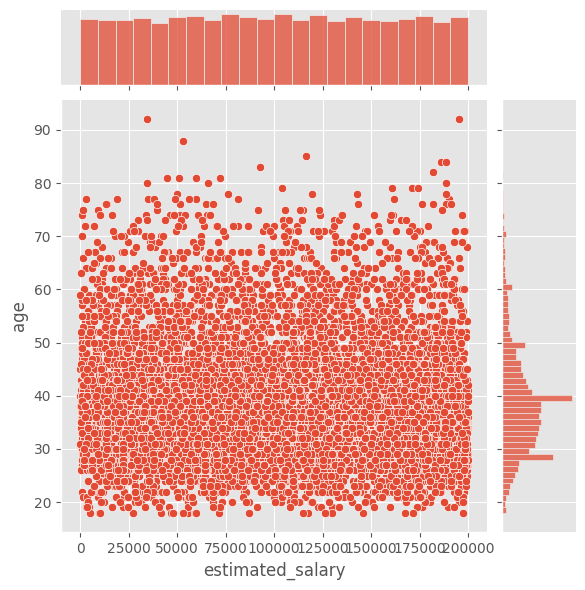

In [17]:
_ = sns.jointplot(x='estimated_salary', y='age', data=churn)

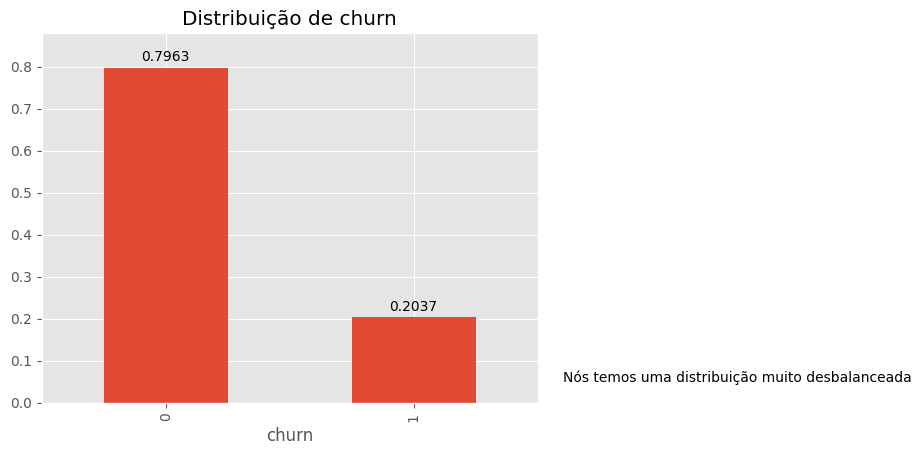

In [19]:
_ = churn.churn.value_counts(1).plot.bar()
_ = plt.title("Distribuição de churn")
_ = plt.text(-0.1, 0.815, churn.churn.value_counts(1)[0])
_ = plt.text(0.9, 0.22, churn.churn.value_counts(1)[1])
_ = plt.ylim(0, 0.88)
_ = plt.text(1.6, 0.05, "Nós temos uma distribuição muito desbalanceada")

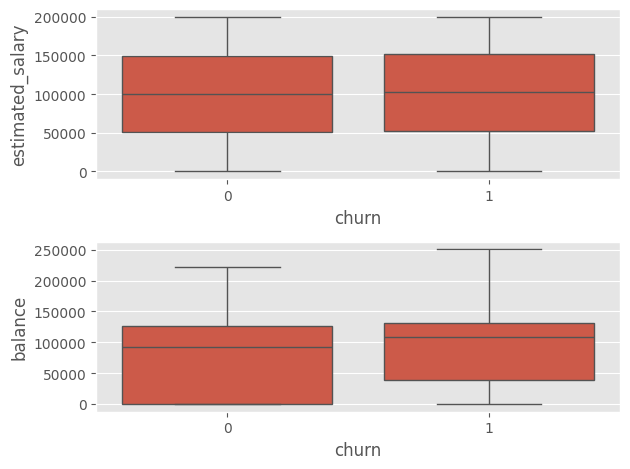

In [21]:
fig, axes = plt.subplots(2, 1)

_ = sns.boxplot(data=churn, x='churn', y='estimated_salary', ax=axes[0])
_ = sns.boxplot(data=churn, x='churn', y='balance', ax=axes[1])

_ = fig.tight_layout()


Aparentemente, o salário não é um bom preditor de churn. Por outro lado, parece que o saldo tem alguma relação com o churn. As pessoas que dãp churn possuem saldo menor do que quem não dá churn.




In [22]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [23]:
churn.groupby('churn')['balance'].median()

churn
0     92072.68
1    109349.29
Name: balance, dtype: float64

In [24]:
churn.groupby('churn').agg({'balance': ['mean', 'median']})

balance           
               mean     median
churn                         
0      72745.296779   92072.68
1      91108.539337  109349.29

In [25]:
from scipy.stats import skew

agg_func = {
    'estimated_salary': ['min', 'median', 'mean', 'std', skew],
    'balance': ['min', 'median', 'mean', 'std', skew],
    'age': ['min', 'median', 'mean', 'std', skew]
}

churn.groupby('churn').agg(agg_func)

estimated_salary                                                    \
                   min     median           mean           std      skew   
churn                                                                      
0                90.07   99645.04   99738.391772  57405.586966  0.010994   
1                11.58  102460.84  101465.677531  57912.418071 -0.033080   

      balance                                                  age         \
          min     median          mean           std      skew min median   
churn                                                                       
0         0.0   92072.68  72745.296779  62848.040701 -0.046879  18   36.0   
1         0.0  109349.29  91108.539337  58360.794816 -0.512354  18   45.0   

                                       
            mean        std      skew  
churn                                  
0      37.408389  10.125363  1.377439  
1      44.837997   9.761562  0.077920

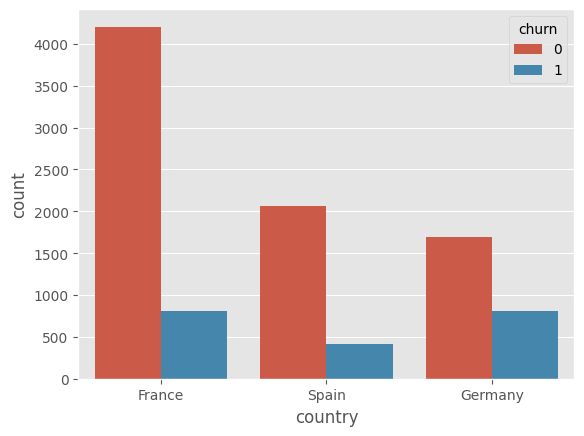

In [28]:
_ = sns.countplot(data=churn, x='country', hue='churn')

In [30]:
churn.groupby('country')['churn'].mean().sort_values()

country
France     0.161548
Spain      0.166734
Germany    0.324432
Name: churn, dtype: float64

In [31]:
churn.groupby('credit_card')['churn'].mean().sort_values()

credit_card
1    0.201843
0    0.208149
Name: churn, dtype: float64

# Conclusão

A análise acima buscou entender quais as variáveis que estão relacionadas ao churn.
Vimos que clientes com saldo menor maior estão mais propensas.

# Observações

Como você viu nos vídeos acima, você tem um desafio para casa: criar análises para seu portfólio. Para facilitar ainda mais seu trabalho, aqui vão algumas dicas sobre como escolher o gráfico a ser utilizado na investigação, ou outro tipo de abordagem:

- Pense bem no storytelling e no público. O que você quer mostrar exatamente? Pretende mostrar, por exemplo, o que está causando a queda nas vendas da empresa? Que tal começar contextualizando o perfil dos clientes, mostrar a distribuição de gêneros e idade, depois mostrar numa linha do tempo quando começa a queda. E aí, vai chegando na conclusão, que mostra quais variáveis se relacionam com aquela queda.

## Algumas escolhas tradicionais de gráficos/análise:

- Distribuição de variável contínua (ex.: idade, salário, altura, preço): boxplot, histograma e swarmplot.
- Distribuição de variável categórica (classe social, gênero, país, profissão): mostre com gráficos de barras qual a frequência de cada categoria da variável em questão.
- Relação entre duas variáveis contínuas: Gráfico de dispersão.
Relação entre uma variável categórica e uma contínua: Utilize boxplots para as diferentes categorias. Ou seja, coloque no eixo x a variável categórica e no y a variável contínua.
- Relação entre duas categóricas: Uma tabela cruzada com a contagem seria interessante. Você pode incluir o percentual da linha ou da coluna.
- Se for incluir o ponto anterior num slide, pode usar de marcações com círculos e legendas em locais importantes. 

**Evite:** gráficos de pizza e de rosca, 2 eixos-y.